In this notebook, I plan to basic DSA muon quantities. This would be a good notebook to rerun after making any changes to DSA muon ID or selection choices or implementation. I will also plot PF muon quantities for comparison

In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, llpnanoaodschema, utilities
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_200GeV_0p25GeV_10p0mm',
    '2Mu2E_200GeV_0p25GeV_0p01mm',
    '2Mu2E_200GeV_5p0GeV_2p0mm',
    '2Mu2E_200GeV_5p0GeV_200p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    maxchunks=1,
    skipbadfiles=True
)

channels = [
    "baseNoLj_matchedLeptons",
    "baseNoLjNoLjsource_matchedLeptons",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["muon_base", "dsaMuon_base", "lepton_genA_base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:285: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 3431) with [[None, None], [None, None], ..., [None, ...], [None, None, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 1267) 
with [[0, 1, 2, 3], [0, 1], [0], [0], [0], ..., [0, 1, ..., 3], [0, 1], [], [0], [0]]: index out of range while 
attempting to get index 3 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-50/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 1815) with [[0, 0, None], [0, 0, None], ..., [None, ..., None], [None, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 3431) with [[0, 0, 0, None, None], [0, 0, ..., None], ..., [None, None, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 1815) with [[0, 0, 0, 0, None], [0, 0, 0, 0, None], ..., [0, None, None, None, None]]: too many jagged slice
dimensions for array

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 5988) with [[0, 0, None, None, None], [0, 0, ..., None, None], ..., [0, 0, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 1951) 
with [[], [], [], [1, 2, 4, 5], [], [1, 2, 3, 5], ..., [0], [], [2, 3], [3], [], [2]]: index out of range while 
attempting to get index 2 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-50/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 4268) with [[0, 0, None, None, None], [0, 0, ..., None, None], ..., [0, 0, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 5988) with [[0, 0, None, None, None], [0, 0, ..., None, None], ..., [0, 0, 0, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 4268) with [[0, 0, None, None, None], [0, 0, ..., None, None], ..., [0, 0, 0, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 4868) with [[0, 0, None, None, None], [0, 0, ..., None], ..., [0, 0, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 1602) 
with [[], [2], [2, 3, 4, 5, 6], [2, 3], [1, 2, 3], ..., [...], [1], [2, 3], [2], []]: index out of range while 
attempting to get index 2 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-50/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 3521) with [[0, 0, None, None, None], [0, 0, ..., None], ..., [0, 0, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 4868) with [[0, 0, None, None, None], [0, 0, ..., None], ..., [0, 0, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 3521) with [[0, 0, None, None, None], [0, 0, ..., None], ..., [0, 0, None, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 2888) with [[None], [None], [...], ..., [None, None, None, None], [None, None, None, None]]: too many jagged
slice dimensions for array

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 979) 
with [[0, 1], [0, 1, 2, 3, 4], [0, 1, 2], ..., [0, 1, ..., 3, 4], [0, 1], [0, 1, 2]]: index out of range while 
attempting to get index 1 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-50/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 1422) with [[0, None, None, None], [0, None, None, None], ..., [...], [0, 0, None, None]]: too many jagged 
slice dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested muons collection. Skipping.... cannot slice NumpyArray (of 
length 2888) with [[0, 0, 0, 0, None], [0, 0, 0, 0, None], ..., [0, None, None, None, None]]: too many jagged slice
dimensions for array

Warning: Unable to apply dR(mu, A) < 0.5 for nested dsaMuons collection. Skipping.... cannot slice NumpyArray (of 
length 1422) with [[0, 0, None, None, None], [0, 0, ..., None, None], ..., [0, 0, 0, None, None]]: too many jagged 
slice dimensions for array

2Mu2E_200GeV_0p25GeV_10p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_0p25GeV_0p01mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_5p0GeV_2p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_5p0GeV_200p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


In [4]:
def plot_row(plots, samples, ch, ylog=False, density=False):
    n = len(plots)
    plt.subplots(1, n, figsize=(12*n, 10))
    for i, plot in enumerate(plots):
        plt.subplot(1, n, i+1)
        for s in samples:
            utilities.plot(out[s]["hists"][plot][ch, :], density=density)
            if ylog:
                plt.yscale("log")
            plt.legend(samples)

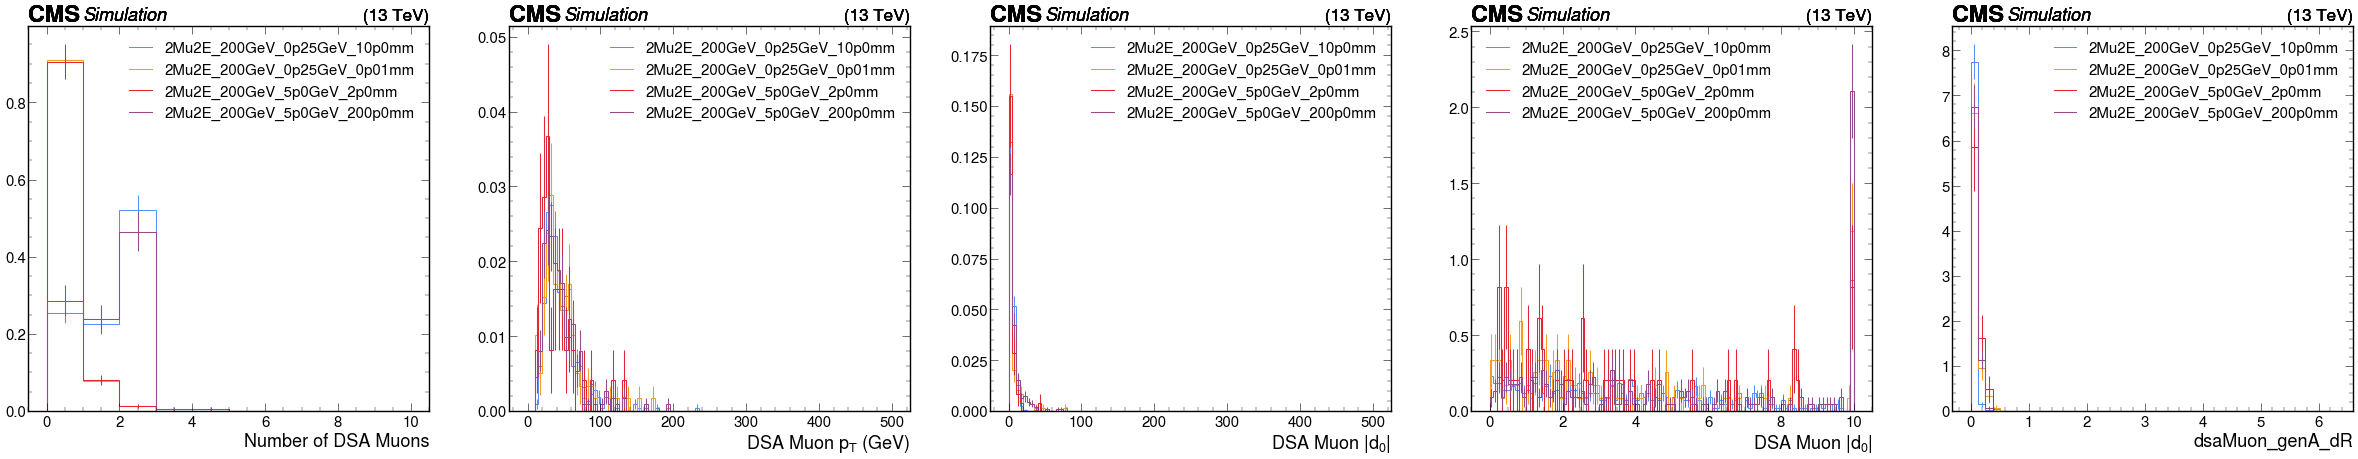

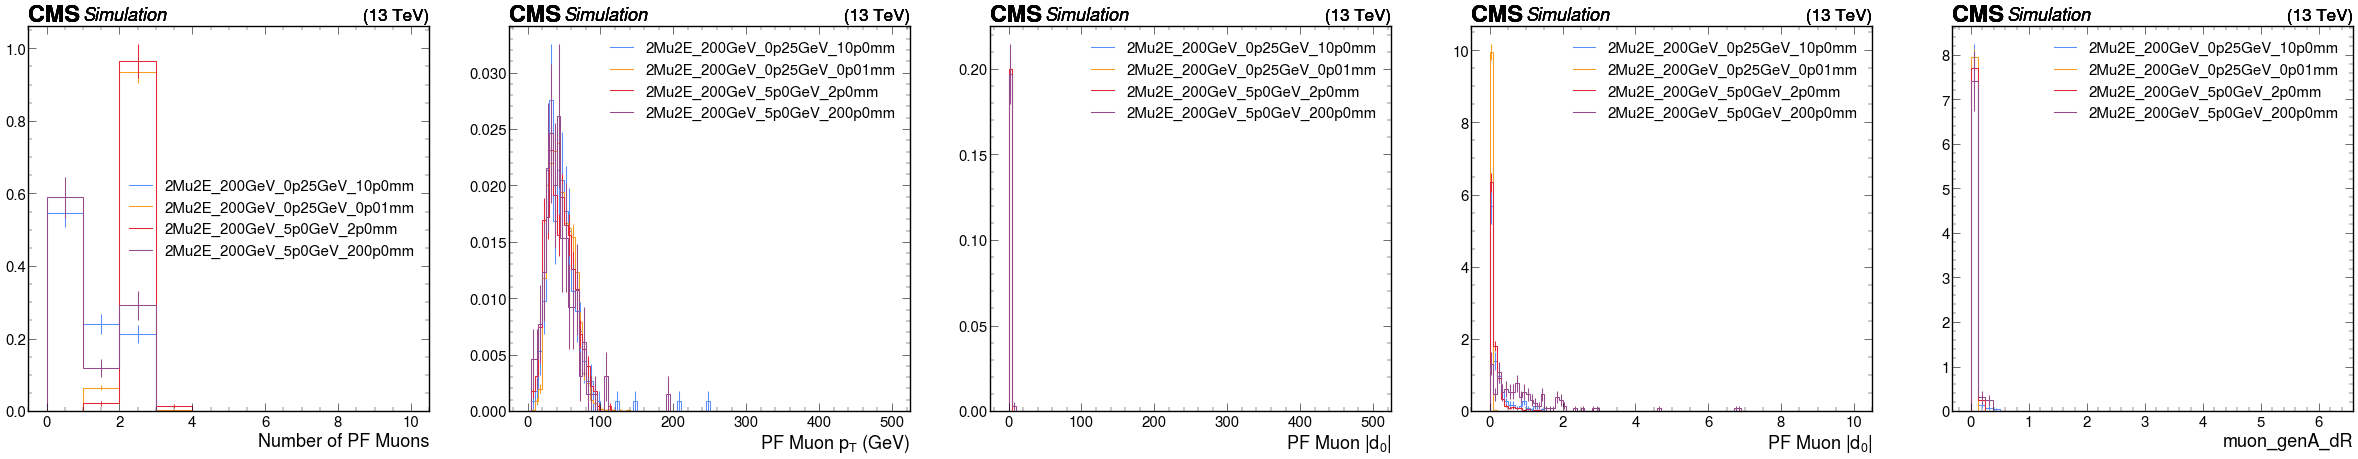

In [7]:
plot_row(["dsaMuon_n", "dsaMuon_pt", "dsaMuon_absD0", "dsaMuon_absD0_lowRange", "dsaMuon_genA_dR"], samples, channels[0], density=True)
plot_row(["muon_n", "muon_pt", "muon_absD0", "muon_absD0_lowRange", "muon_genA_dR"], samples, channels[0], density=True)

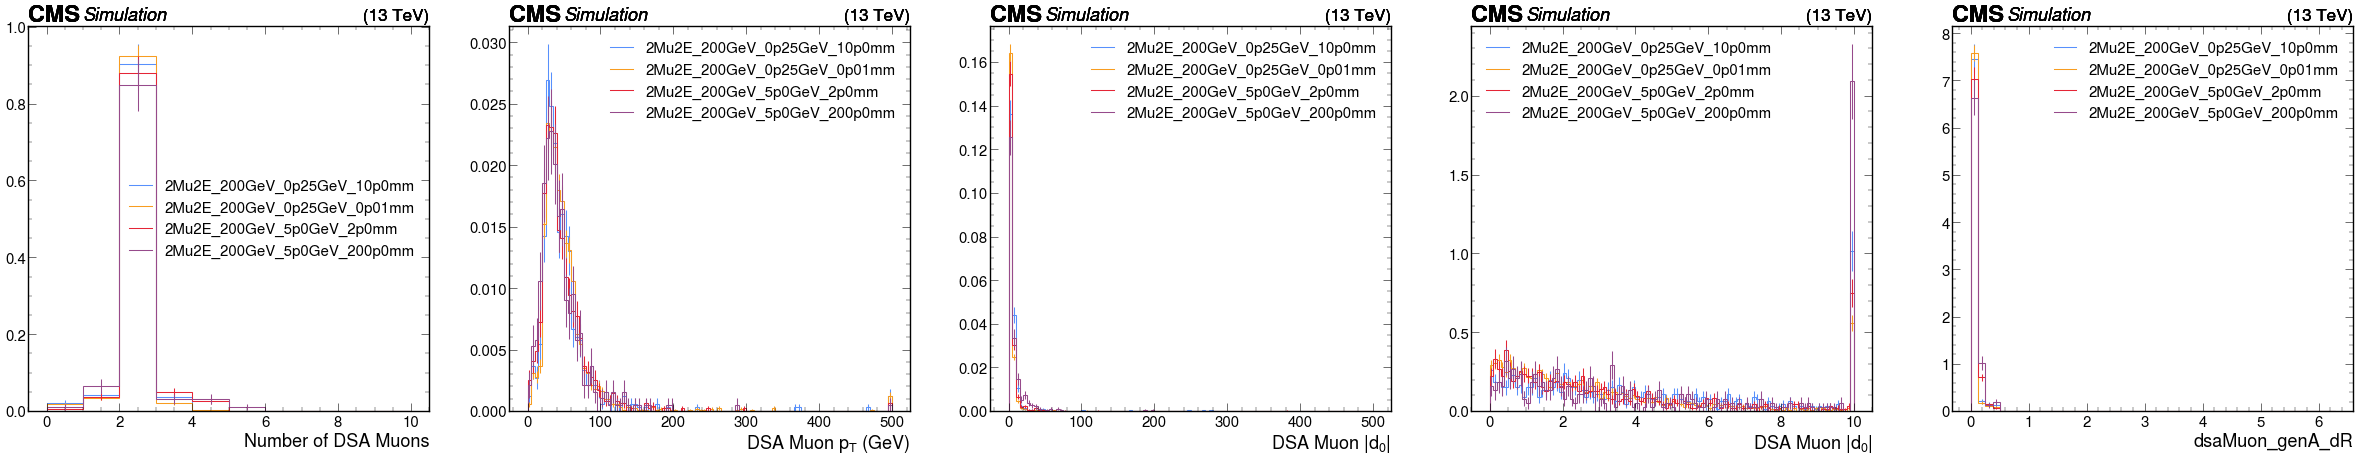

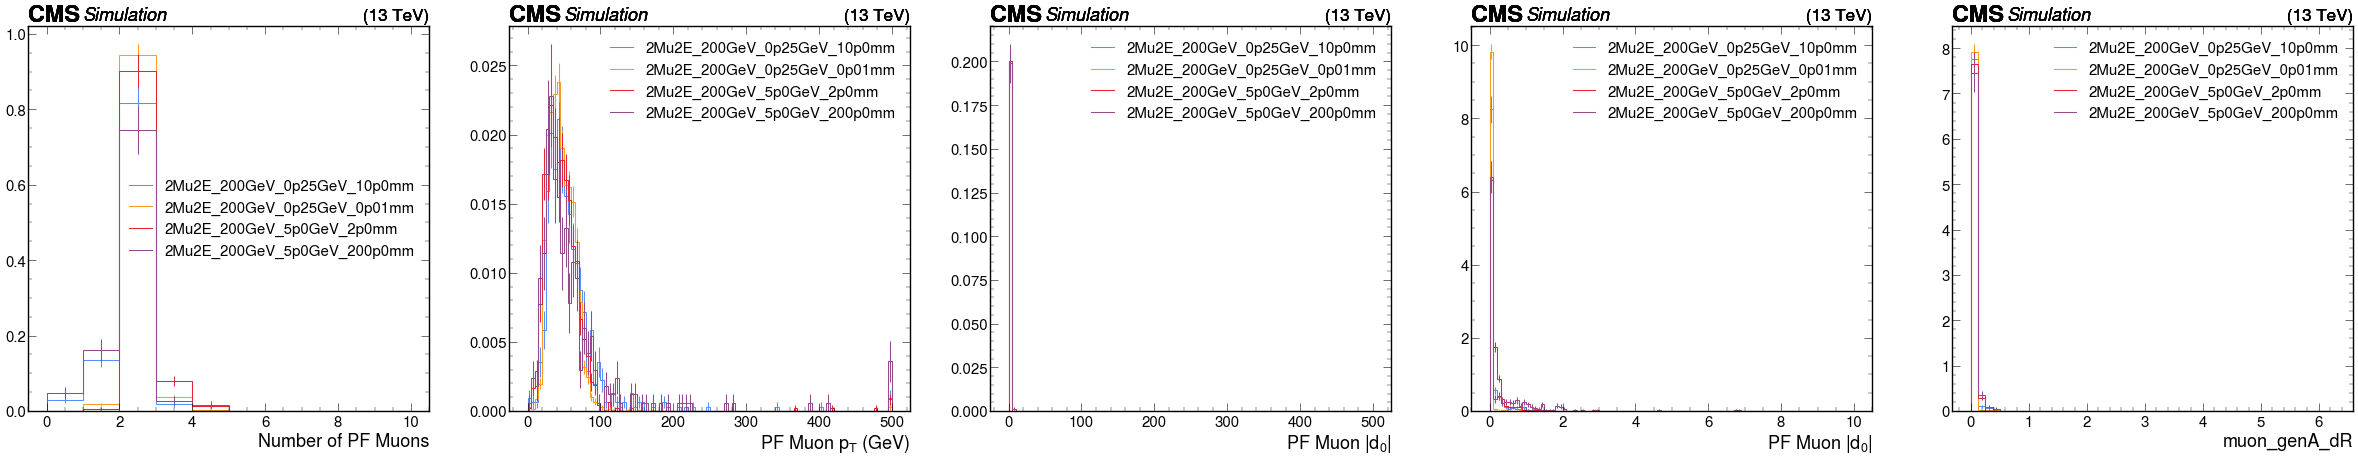

In [8]:
plot_row(["dsaMuon_n", "dsaMuon_pt", "dsaMuon_absD0", "dsaMuon_absD0_lowRange", "dsaMuon_genA_dR"], samples, channels[1], density=True)
plot_row(["muon_n", "muon_pt", "muon_absD0", "muon_absD0_lowRange", "muon_genA_dR"], samples, channels[1], density=True)